In [4]:
from pyei.data import Datasets
import numpy as np

santa_clara_data = Datasets.Santa_Clara.to_dataframe()

group_fractions_rbyc = np.array(santa_clara_data[['pct_ind_vote', 'pct_e_asian_vote', 'pct_non_asian_vote']]).T
votes_fractions_rbyc = np.array(santa_clara_data[['pct_for_hardy2', 'pct_for_kolstad2', 'pct_for_nadeem2']]).T
precinct_pops = np.array(santa_clara_data['total2'])

print(group_fractions_rbyc.shape) # shape: r x num_precincts
print(votes_fractions_rbyc.shape) # shape c x num_precincts
print(precinct_pops.shape) # shape: num_precincts
#print(group_fractions_rbyc.sum(axis=0))
#print(votes_fractions_rbyc.sum(axis=0))

/Users/mahir/416/c1/ei_test/ei_venv/lib/python3.12/site-packages/numba/core/decorators.py:248: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


(3, 42)
(3, 42)
(42,)


In [5]:
import numpy as np
import pymc as pm

from pyei.data import Datasets
from pyei.two_by_two import TwoByTwoEI
from pyei.goodmans_er import GoodmansER
from pyei.goodmans_er import GoodmansERBayes
from pyei.r_by_c import RowByColumnEI
from pyei.io_utils import from_netcdf, to_netcdf

In [35]:
# Example rxc data (here r=c=3)
santa_clara_data = Datasets.Santa_Clara.to_dataframe() # This line same as 2x2 example

group_fractions_rbyc = np.array(santa_clara_data[['pct_ind_vote', 'pct_e_asian_vote', 'pct_non_asian_vote']]).T
votes_fractions_rbyc = np.array(santa_clara_data[['pct_for_hardy2', 'pct_for_kolstad2', 'pct_for_nadeem2']]).T
precinct_names = santa_clara_data['precinct'] # This line same as 2x2 example

candidate_names_rbyc = ["Hardy", "Kolstad", "Nadeem"]
demographic_group_names_rbyc = ["ind", "e_asian", "non_asian"]
precinct_pops = np.array(santa_clara_data['total2']) # This line same as 2x2 example

In [36]:
# Fitting a first r x c model

# Create a RowByColumnEI object
ei_rbyc = RowByColumnEI(model_name='multinomial-dirichlet-modified', pareto_shape=100, pareto_scale=100)

# Fit the model
ei_rbyc.fit(group_fractions_rbyc, 
       votes_fractions_rbyc, 
       precinct_pops, 
       demographic_group_names=demographic_group_names_rbyc, 
       candidate_names=candidate_names_rbyc, 
       #precinct_names=precinct_names, 
)

# Generate a simple report to summarize the results
print(ei_rbyc.summary())

Running ['ind', 'e_asian', 'non_asian'] x ['Hardy', 'Kolstad', 'Nadeem'] EI
r = 3 rows (demographic groups)
c = 3 columns (candidates or voting outcomes)
number of precincts = 42


Compiling.. :   0%|          | 0/2500 [00:00<?, ?it/s]





Running chain 0:   0%|          | 0/2500 [00:03<?, ?it/s]


Running chain 0:   5%|▌         | 125/2500 [00:05<00:34, 69.14it/s]


Running chain 0:  15%|█▌        | 375/2500 [00:08<00:22, 93.19it/s]


Running chain 0:  25%|██▌       | 625/2500 [00:10<00:19, 95.44it/s]


Running chain 0:  40%|████      | 1000/2500 [00:14<00:14, 106.02it/s]


Running chain 0:  50%|█████     | 1250/2500 [00:17<00:13, 92.86it/s]

Running chain 0:  60%|██████    | 1500/2500 [00:20<00:13, 76.78it/s]

Running chain 0:  65%|██████▌   | 1625/2500 [00:23<00:14, 60.99it/s]


Running chain 0:  80%|████████  | 2000/2500 [00:30<00:08, 59.35it/s]

Running chain 0:  95%|█████████▌| 2375/2500 [00:38<00:02, 52.56it/s]


Running chain 0: 100%|██████████| 2500/2500 [00:41<00:00, 60.87it/s]

















Running chain 1: 100%|██████████| 2500/2500 [01:03<00:00, 39.18it/s]













Running chain 2: 100%|██████████| 2500/2500 [01:19<00:00, 31.44it/s]


Running


            Computed from the raw b_ samples by multiplying by group populations and then
            getting the proportion of the total pop
            (total pop=summed across all districts):
            The posterior mean for the district-level voting preference of
                ind for Hardy is
                0.170
                95% equal-tailed credible interval:  [0.01267321 0.46812929]
                The posterior mean for the district-level voting preference of
                ind for Kolstad is
                0.132
                95% equal-tailed credible interval:  [0.00563086 0.42190752]
                The posterior mean for the district-level voting preference of
                ind for Nadeem is
                0.698
                95% equal-tailed credible interval:  [0.35021347 0.94582174]
                The posterior mean for the district-level voting preference of
                e_asian for Hardy is
                0.748
                95% equal-tailed c

In [40]:
# modified rxc model instantiation

santa_clara_data = Datasets.Santa_Clara.to_dataframe() # This line same as 2x2 example

group_fractions_rbyc = np.array(santa_clara_data[['pct_ind_vote', 'pct_e_asian_vote', 'pct_non_asian_vote']]).T
votes_fractions_rbyc = np.array(santa_clara_data[['pct_for_hardy2', 'pct_for_kolstad2', 'pct_for_nadeem2']]).T
precinct_names = santa_clara_data['precinct'] # This line same as 2x2 example

candidate_names_rbyc = ["Hardy", "Kolstad", "Nadeem"]
demographic_group_names_rbyc = ["ind", "e_asian", "non_asian"]
precinct_pops = np.array(santa_clara_data['total2']) # This line same as 2x2 example

In [41]:
# Fitting a first r x c model

# Create a RowByColumnEI object
ei_rbyc = RowByColumnEI(model_name='multinomial-dirichlet-modified', pareto_shape=100, pareto_scale=100)

# Fit the model
ei_rbyc.fit(group_fractions_rbyc, 
       votes_fractions_rbyc, 
       precinct_pops, 
       demographic_group_names=demographic_group_names_rbyc, 
       candidate_names=candidate_names_rbyc, 
       #precinct_names=precinct_names, 
)

# Generate a simple report to summarize the results
print(ei_rbyc.summary())

Running ['ind', 'e_asian', 'non_asian'] x ['Hardy', 'Kolstad', 'Nadeem'] EI
r = 3 rows (demographic groups)
c = 3 columns (candidates or voting outcomes)
number of precincts = 42


Compiling.. :   0%|          | 0/2500 [00:00<?, ?it/s]





Running chain 0:   0%|          | 0/2500 [00:03<?, ?it/s]




Running chain 0:   5%|▌         | 125/2500 [00:05<00:38, 62.10it/s]


Running chain 0:  10%|█         | 250/2500 [00:06<00:26, 84.41it/s]


Running chain 0:  15%|█▌        | 375/2500 [00:08<00:28, 75.22it/s]

Running chain 0:  20%|██        | 500/2500 [00:10<00:26, 74.26it/s]


Running chain 0:  25%|██▌       | 625/2500 [00:12<00:26, 70.29it/s]


Running chain 0:  30%|███       | 750/2500 [00:14<00:26, 64.84it/s]

Running chain 0:  35%|███▌      | 875/2500 [00:16<00:26, 60.24it/s]


Running chain 0:  40%|████      | 1000/2500 [00:19<00:25, 57.87it/s]

Running chain 0:  45%|████▌     | 1125/2500 [00:21<00:23, 57.70it/s]


Running chain 0:  50%|█████     | 1250/2500 [00:23<00:21, 57.26it/s]

Running chain 0:  55%|█████▌    | 1375/2500 [00:26<00:21, 52.00it/s]





Running chain 0:  60%|██████    | 1500/2500 [00:29<00:21, 45.75it/s]

Running chain 0:  65%|██████▌   | 1


            Computed from the raw b_ samples by multiplying by group populations and then
            getting the proportion of the total pop
            (total pop=summed across all districts):
            The posterior mean for the district-level voting preference of
                ind for Hardy is
                0.146
                95% equal-tailed credible interval:  [0.02123303 0.40005027]
                The posterior mean for the district-level voting preference of
                ind for Kolstad is
                0.139
                95% equal-tailed credible interval:  [0.00777933 0.40243038]
                The posterior mean for the district-level voting preference of
                ind for Nadeem is
                0.715
                95% equal-tailed credible interval:  [0.41185621 0.92890312]
                The posterior mean for the district-level voting preference of
                e_asian for Hardy is
                0.772
                95% equal-tailed c

In [ ]:
#print(ei_rbyc.sampled_voting_prefs)
#print(ei_rbyc.sampled_voting_prefs.shape)
print(ei_rbyc.sim_trace.posterior)


<xarray.Dataset> Size: 13MB
Dimensions:          (chain: 4, draw: 1000, kappa_dim_0: 3, phi_dim_0: 3,
                      phi_dim_1: 3, b_dim_0: 42, b_dim_1: 3, b_dim_2: 3,
                      phi_kappa_dim_0: 3, phi_kappa_dim_1: 3)
Coordinates:
  * chain            (chain) int64 32B 0 1 2 3
  * draw             (draw) int64 8kB 0 1 2 3 4 5 6 ... 994 995 996 997 998 999
  * kappa_dim_0      (kappa_dim_0) int64 24B 0 1 2
  * phi_dim_0        (phi_dim_0) int64 24B 0 1 2
  * phi_dim_1        (phi_dim_1) int64 24B 0 1 2
  * b_dim_0          (b_dim_0) int64 336B 0 1 2 3 4 5 6 ... 35 36 37 38 39 40 41
  * b_dim_1          (b_dim_1) int64 24B 0 1 2
  * b_dim_2          (b_dim_2) int64 24B 0 1 2
  * phi_kappa_dim_0  (phi_kappa_dim_0) int64 24B 0 1 2
  * phi_kappa_dim_1  (phi_kappa_dim_1) int64 24B 0 1 2
Data variables:
    kappa            (chain, draw, kappa_dim_0) float64 96kB 100.1 ... 101.4
    phi              (chain, draw, phi_dim_0, phi_dim_1) float64 288kB 0.0643...
    b          

In [54]:
post = ei_rbyc.sim_trace.posterior

# Posterior mean over chain + draw
b_mean = post["b"].mean(dim=("chain", "draw"))
# b_mean shape: (county, race, candidate)

# Choose your indices
race_idx = 0        # e.g., White = 0, Black = 1, Asian = 2 ...
cand_idx = 1        # e.g., Candidate B = 1, etc.

# Get posterior means for chosen group/candidate across all counties
county_means = b_mean[:, race_idx, cand_idx]
print(county_means)


<xarray.DataArray 'b' (b_dim_0: 42)> Size: 336B
array([0.13985389, 0.14152996, 0.13853472, 0.13937875, 0.13937638,
       0.1393797 , 0.13933869, 0.13883632, 0.13931281, 0.14126881,
       0.1404027 , 0.1397848 , 0.14103982, 0.13960286, 0.13854656,
       0.13784055, 0.14062587, 0.13921565, 0.13969184, 0.14017269,
       0.14097336, 0.14105337, 0.13274176, 0.14202801, 0.1356079 ,
       0.14084434, 0.13941848, 0.1417946 , 0.13951476, 0.13909124,
       0.1398795 , 0.14021263, 0.13951061, 0.1402714 , 0.1401622 ,
       0.13796091, 0.14000966, 0.14004854, 0.1404448 , 0.14064416,
       0.14012631, 0.13968922])
Coordinates:
  * b_dim_0  (b_dim_0) int64 336B 0 1 2 3 4 5 6 7 8 ... 34 35 36 37 38 39 40 41
    b_dim_1  int64 8B 0
    b_dim_2  int64 8B 1


In [77]:
import pandas as pd
df = pd.DataFrame(county_means)
print(df)

           0
0   0.139854
1   0.141530
2   0.138535
3   0.139379
4   0.139376
5   0.139380
6   0.139339
7   0.138836
8   0.139313
9   0.141269
10  0.140403
11  0.139785
12  0.141040
13  0.139603
14  0.138547
15  0.137841
16  0.140626
17  0.139216
18  0.139692
19  0.140173
20  0.140973
21  0.141053
22  0.132742
23  0.142028
24  0.135608
25  0.140844
26  0.139418
27  0.141795
28  0.139515
29  0.139091
30  0.139880
31  0.140213
32  0.139511
33  0.140271
34  0.140162
35  0.137961
36  0.140010
37  0.140049
38  0.140445
39  0.140644
40  0.140126
41  0.139689


In [6]:
import numpy as np
import pymc as pm

from pyei.data import Datasets
from pyei.two_by_two import TwoByTwoEI
from pyei.goodmans_er import GoodmansER
from pyei.goodmans_er import GoodmansERBayes
from pyei.r_by_c import RowByColumnEI
from pyei.io_utils import from_netcdf, to_netcdf

In [ ]:
#excluded all negative values (makeshift solution)

import pandas as pd

df = pd.read_csv("2020_eavs_data/eavs_2020_latest.csv")
df = df.query("State_Abbr == 'FL'")

df["total_rejected"] = df[["B18a", "B19a", "B20a", "B21a", "B22a", "C4a", "B3a"]].clip(lower=0).sum(axis=1)

df["total_counted"] = df[["B14a", "B15a", "B16a", "B17a", "C3a", "B24a", "E1b"]].clip(lower=0).sum(axis=1)

df["total_submitted"] = df["total_rejected"] + df["total_counted"]

safe_total = df["total_submitted"].replace(0, pd.NA)

df["pct_total_rejected"] = df["total_rejected"] / safe_total
df["pct_not_rejected"] = df["total_counted"] / safe_total

new_df = pd.DataFrame({
    "county_id": df["Jurisdiction_Name"],
    "total_rejected": df["total_rejected"],
    "total_submitted": df["total_submitted"],
    "pct_total_rejected": df["pct_total_rejected"],
    "pct_not_rejected": df["pct_not_rejected"],
})

print(new_df)
new_df.to_csv("florida_rejection_rates.csv", index=False)

             county_id  total_rejected  total_submitted  pct_total_rejected  \
454     ALACHUA COUNTY           250.0          63647.0            0.003928   
455       BAKER COUNTY             0.0           2908.0            0.000000   
456         BAY COUNTY           164.0          29217.0            0.005613   
457    BRADFORD COUNTY            12.0           3935.0            0.003050   
458     BREVARD COUNTY           620.0         152749.0            0.004059   
..                 ...             ...              ...                 ...   
516       UNION COUNTY             1.0           1252.0            0.000799   
517     VOLUSIA COUNTY           407.0         145652.0            0.002794   
518     WAKULLA COUNTY            18.0           5357.0            0.003360   
519      WALTON COUNTY            80.0          12417.0            0.006443   
520  WASHINGTON COUNTY             9.0           3124.0            0.002881   

     pct_not_rejected  
454          0.996072  
455

In [8]:
import pandas as pd

df = pd.read_csv("2020_cvap_data/County.csv", encoding="latin1")

clean_geoid = df["geoid"].astype(str).str.replace(r"^0500000US", "", regex=True)
state_mask = clean_geoid.str[:2] == "12"

df["lnnumber"] = pd.to_numeric(df["lnnumber"], errors="coerce")
ln_mask = df["lnnumber"].isin([1, 2, 13])

df_fl = df[state_mask & ln_mask].copy()

counts = df_fl.pivot_table(
    index=["geoname", "geoid"],
    columns="lnnumber",
    values="tot_est",
    aggfunc="sum"
)

counts = counts.rename(columns={
    1: "total_pop",
    2: "non_hispanic_pop",
    13: "hispanic_pop"
})

counts = counts.reset_index().fillna(0)

# Raw shares (may not sum exactly to 1)
counts["hispanic_share_raw"] = counts["hispanic_pop"] / counts["total_pop"]
counts["non_hispanic_share_raw"] = counts["non_hispanic_pop"] / counts["total_pop"]

# Normalize so group shares sum to 1 for each county
row_sum = counts[["hispanic_share_raw", "non_hispanic_share_raw"]].sum(axis=1)
counts["hispanic_share"] = counts["hispanic_share_raw"] / row_sum
counts["non_hispanic_share"] = counts["non_hispanic_share_raw"] / row_sum

counts = counts[
    [
        "geoname", "geoid",
        "total_pop", "hispanic_pop", "non_hispanic_pop",
        "hispanic_share", "non_hispanic_share"
    ]
]

print(counts)
counts.to_csv("florida_race_data.csv", index=False)


lnnumber                     geoname           geoid  total_pop  hispanic_pop  \
0            Alachua County, Florida  0500000US12001     268105         27240   
1              Baker County, Florida  0500000US12003      28680           770   
2                Bay County, Florida  0500000US12005     180075         11945   
3           Bradford County, Florida  0500000US12007      27725          1205   
4            Brevard County, Florida  0500000US12009     594000         63065   
..                               ...             ...        ...           ...   
62             Union County, Florida  0500000US12125      15280           880   
63           Volusia County, Florida  0500000US12127     546105         79015   
64           Wakulla County, Florida  0500000US12129      32855          1265   
65            Walton County, Florida  0500000US12131      71050          4460   
66        Washington County, Florida  0500000US12133      25095           970   

lnnumber  non_hispanic_pop 

In [23]:
# 2 by 2
import pandas as pd

rej_df = pd.read_csv("florida_rejection_rates.csv")
race_df = pd.read_csv("florida_race_data.csv")

rej_fractions = rej_df[["pct_total_rejected"]].to_numpy()
group_fractions = race_df[["hispanic_share"]].to_numpy()
county_names = rej_df["county_id"].to_numpy()

print(rej_fractions.shape)
print(group_fractions.shape)
print(county_names.shape)

category_names = "Rejected"
demographic_group_names = "hispanic"
county_pops = race_df["total_pop"].to_numpy()

(67, 1)
(67, 1)
(67,)


In [19]:
import pandas as pd

rej_df = pd.read_csv("florida_rejection_rates.csv")
race_df = pd.read_csv("florida_race_data.csv")

rej_fractions = rej_df[["pct_total_rejected", "pct_not_rejected"]].to_numpy().T
group_fractions = race_df[["hispanic_share", "non_hispanic_share"]].to_numpy().T
county_names = rej_df["county_id"].to_numpy()

print(rej_fractions.shape)
print(group_fractions.shape)
print(county_names.shape)

category_names = ["Rejected", "Not Rejected"]
demographic_group_names = ["hispanic", "not hispanic"]
county_pops = race_df["total_pop"].to_numpy()
print(county_pops.shape)


(2, 67)
(2, 67)
(67,)
(67,)


In [24]:
# Fitting a first 2 x 2 model

# Create a TwobyTwoEI object
ei_2by2 = TwoByTwoEI(model_name="king99_pareto_modification", pareto_scale=15, pareto_shape=2)

# Fit the model
ei_2by2.fit(group_fractions, 
       rej_fractions, 
       county_pops, 
       demographic_group_names=demographic_group_names, 
       candidate_names=category_names, 
       precinct_names=county_names, 
       draws=1200, # optional
       tune=3000, # optional
       target_accept=.99# optional
)

# Generate a simple report to summarize the results
print(ei_2by2.summary())

Compiling.. :   0%|          | 0/4200 [00:00<?, ?it/s]





Running chain 0:   0%|          | 0/4200 [00:05<?, ?it/s]



Running chain 0:   5%|▌         | 210/4200 [00:23<05:33, 11.95it/s]


Running chain 0:  10%|█         | 420/4200 [00:35<04:17, 14.68it/s]



Running chain 0:  15%|█▌        | 630/4200 [00:47<03:41, 16.10it/s]


Running chain 0:  20%|██        | 840/4200 [00:55<02:58, 18.83it/s]


Running chain 0:  25%|██▌       | 1050/4200 [01:06<02:44, 19.14it/s]


Running chain 0:  30%|███       | 1260/4200 [01:15<02:25, 20.21it/s]


Running chain 0:  40%|████      | 1680/4200 [01:33<01:57, 21.51it/s]






Running chain 0:  45%|████▌     | 1890/4200 [01:44<01:51, 20.78it/s]


Running chain 0:  50%|█████     | 2100/4200 [01:52<01:35, 22.10it/s]

Running chain 0:  55%|█████▌    | 2310/4200 [02:01<01:23, 22.55it/s]

Running chain 0:  60%|██████    | 2520/4200 [02:10<01:13, 22.71it/s]


Running chain 0:  65%|██████▌   | 2730/4200 [02:18<01:02, 23.51it/s]

Running chain 0:  75%|███████

Model: king99_pareto_modification
        Computed from the raw b_i samples by multiplying by population and then getting
        the proportion of the total pop (total pop=summed across all districts):
        The posterior mean for the district-level voting preference of
        given demographic group for given candidate is
        0.004
        The posterior mean for the district-level voting preference of
        non-given demographic group for given candidate is
        0.004
        95% equal-tailed Bayesian credible interval for district-level voting preference of
        given demographic group for given candidate is
        [0.00383888 0.00388198]
        95% equal-tailed Bayesian credible interval for district-level voting preference of
        non-given demographic group for given candidate is
        [0.00412261 0.00413217]
        


In [ ]:
# Fitting a first r x c model

# Create a RowByColumnEI object
ei_rbyc = RowByColumnEI(model_name='multinomial-dirichlet-modified', pareto_shape=100, pareto_scale=100)

# Fit the model
ei_rbyc.fit(group_fractions, 
       rej_fractions, 
       county_pops, 
       demographic_group_names=demographic_group_names, 
       candidate_names=category_names, 
       precinct_names=county_names, 
)

# Generate a simple report to summarize the results
print(ei_rbyc.summary())

Running ['hispanic', 'not hispanic'] x ['Rejected', 'Not Rejected'] EI
r = 2 rows (demographic groups)
c = 2 columns (candidates or voting outcomes)
number of precincts = 67


Compiling.. :   0%|          | 0/2500 [00:00<?, ?it/s]





Running chain 0:   0%|          | 0/2500 [00:02<?, ?it/s]


Running chain 0:   5%|▌         | 125/2500 [00:03<00:06, 340.09it/s]


Running chain 0:  10%|█         | 250/2500 [00:08<01:02, 35.81it/s] 


Running chain 0:  15%|█▌        | 375/2500 [00:14<01:15, 28.19it/s]


Running chain 0:  20%|██        | 500/2500 [00:19<01:17, 25.89it/s]


Running chain 0:  25%|██▌       | 625/2500 [00:26<01:22, 22.65it/s]


Running chain 0:  30%|███       | 750/2500 [00:32<01:19, 22.09it/s]


Running chain 0:  35%|███▌      | 875/2500 [00:38<01:14, 21.77it/s]


Running chain 0:  40%|████      | 1000/2500 [00:44<01:09, 21.43it/s]


Running chain 0:  45%|████▌     | 1125/2500 [00:50<01:04, 21.21it/s]


Running chain 0:  50%|█████     | 1250/2500 [00:56<00:59, 21.11it/s]


Running chain 0:  55%|█████▌    | 1375/2500 [01:02<00:53, 20.97it/s]


Running chain 0:  60%|██████    | 1500/2500 [01:08<00:47, 20.91it/s]


Running chain 0:  65%|██████▌   |


            Computed from the raw b_ samples by multiplying by group populations and then
            getting the proportion of the total pop
            (total pop=summed across all districts):
            The posterior mean for the district-level voting preference of
                hispanic for Rejected is
                0.007
                95% equal-tailed credible interval:  [0.00284296 0.01020994]
                The posterior mean for the district-level voting preference of
                hispanic for Not Rejected is
                0.993
                95% equal-tailed credible interval:  [0.98979006 0.99715704]
                The posterior mean for the district-level voting preference of
                not hispanic for Rejected is
                0.003
                95% equal-tailed credible interval:  [0.00202563 0.00459318]
                The posterior mean for the district-level voting preference of
                not hispanic for Not Rejected is
               

Model: king99_pareto_modification
        Computed from the raw b_i samples by multiplying by population and then getting
        the proportion of the total pop (total pop=summed across all districts):
        The posterior mean for the district-level voting preference of
        given demographic group for given candidate is
        0.004
        The posterior mean for the district-level voting preference of
        non-given demographic group for given candidate is
        0.004
        95% equal-tailed Bayesian credible interval for district-level voting preference of
        given demographic group for given candidate is
        [0.00383888 0.00388198]
        95% equal-tailed Bayesian credible interval for district-level voting preference of
        non-given demographic group for given candidate is
        [0.00412261 0.00413217]
        


<Axes: title={'center': 'Support for given candidate'}>

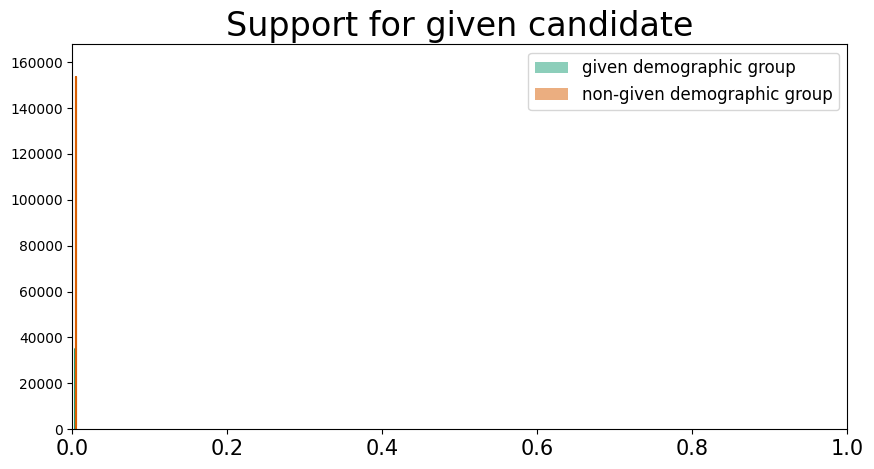

In [30]:
print(ei_2by2.summary())
ei_2by2.plot_kde()